In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
movies = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')
credits = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')

# Display the first few rows of the movies dataframe
movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
# Get a summary of the movies dataset
print(movies.info())

# Get descriptive statistics for numeric features
# print(movies.describe())

# Check for missing values
print(movies.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
# movies['overview'].isnull()

In [6]:
movies=movies.loc[movies['overview'].notnull()] 
# Here removing the rows with null values in overview or can we replace the null values with the tagline also
# movies['release_date'].isnull().sum()
movies=movies.loc[movies['release_date'].notnull()] 

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4799 non-null   int64  
 4   keywords              4799 non-null   object 
 5   original_language     4799 non-null   object 
 6   original_title        4799 non-null   object 
 7   overview              4799 non-null   object 
 8   popularity            4799 non-null   float64
 9   production_companies  4799 non-null   object 
 10  production_countries  4799 non-null   object 
 11  release_date          4799 non-null   object 
 12  revenue               4799 non-null   int64  
 13  runtime               4799 non-null   float64
 14  spoken_languages      4799 non-null   object 
 15  status                4799

In [8]:
print(movies.isnull().sum())

budget                     0
genres                     0
homepage                3087
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  840
title                      0
vote_average               0
vote_count                 0
dtype: int64


In [9]:
movies['tagline'] = movies['tagline'].fillna(movies['title'])
movies.drop('homepage', axis=1, inplace=True)

In [10]:
print(movies.isnull().sum())

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64


In [11]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [12]:

movies['release_date']=pd.to_datetime(movies['release_date'])

In [13]:
movies['release_date']

0      2009-12-10
1      2007-05-19
2      2015-10-26
3      2012-07-16
4      2012-03-07
          ...    
4798   1992-09-04
4799   2011-12-26
4800   2013-10-13
4801   2012-05-03
4802   2005-08-05
Name: release_date, Length: 4799, dtype: datetime64[ns]

In [14]:
movies['year'] = movies['release_date'].dt.year

In [15]:
movies['year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: year, Length: 4799, dtype: int32

**Joining The two datasets**

In [16]:
print(f"Movies dataset shape: {movies.shape}")
print(f"Credits dataset shape: {credits.shape}")

Movies dataset shape: (4799, 20)
Credits dataset shape: (4803, 4)


In [17]:
merged_df = movies.merge(credits, left_on='id', right_on='movie_id', how='left')


In [18]:
merged_df.shape

(4799, 24)

In [19]:
merged_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,tagline,title_x,vote_average,vote_count,year,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,2015,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


**Genre Analysis**

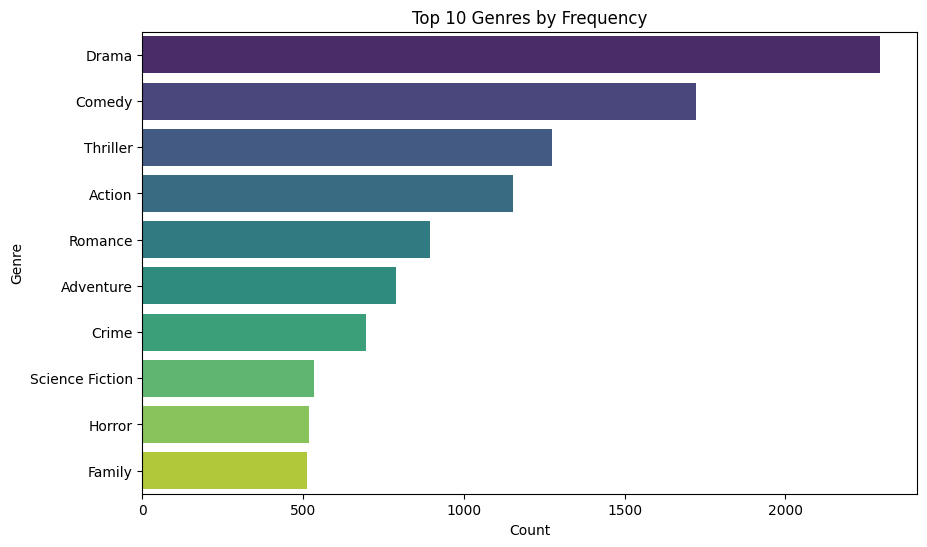

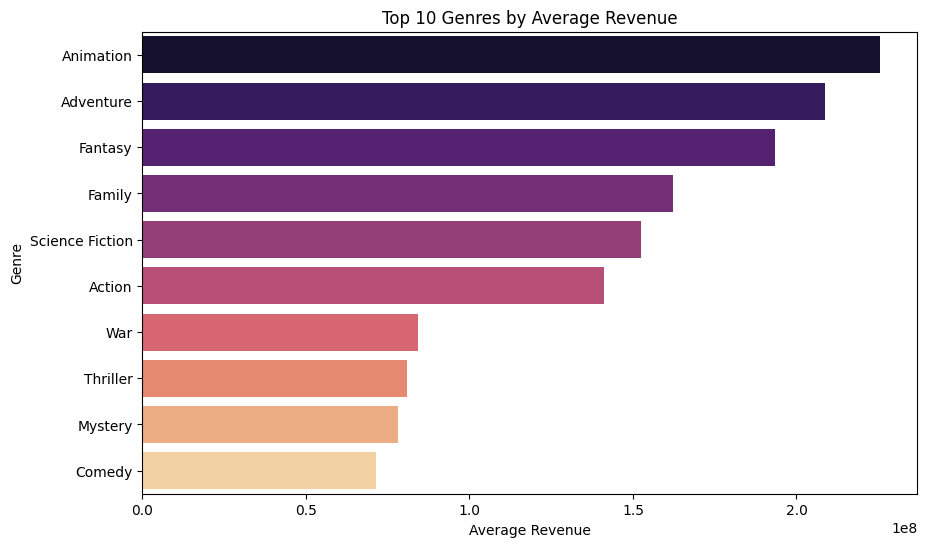

In [20]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns


def parse_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [genre['name'] for genre in genres]
    except Exception:
        return []

merged_df['parsed_genres'] = merged_df['genres'].apply(parse_genres)

# Explode the list so each genre becomes a row for frequency counts
genre_series = merged_df['parsed_genres'].explode()

# Plot 1: Genre Frequency (Top 10)
plt.figure(figsize=(10, 6))
top_genres = genre_series.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Frequency')
plt.show()

# Plot 2: Average Revenue by Genre (Top 10)
# Explode genres for grouping
genre_revenue = merged_df.explode('parsed_genres').groupby('parsed_genres')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_genre_revenue = genre_revenue.head(10)
sns.barplot(x=top_genre_revenue.values, y=top_genre_revenue.index, palette="magma")
plt.xlabel('Average Revenue')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Revenue')
plt.show()


**Cast Analysis**

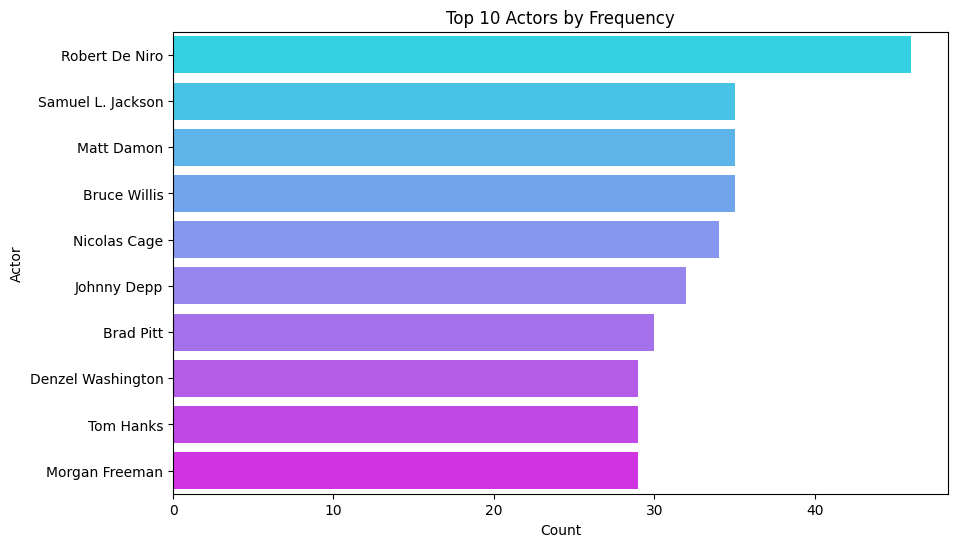

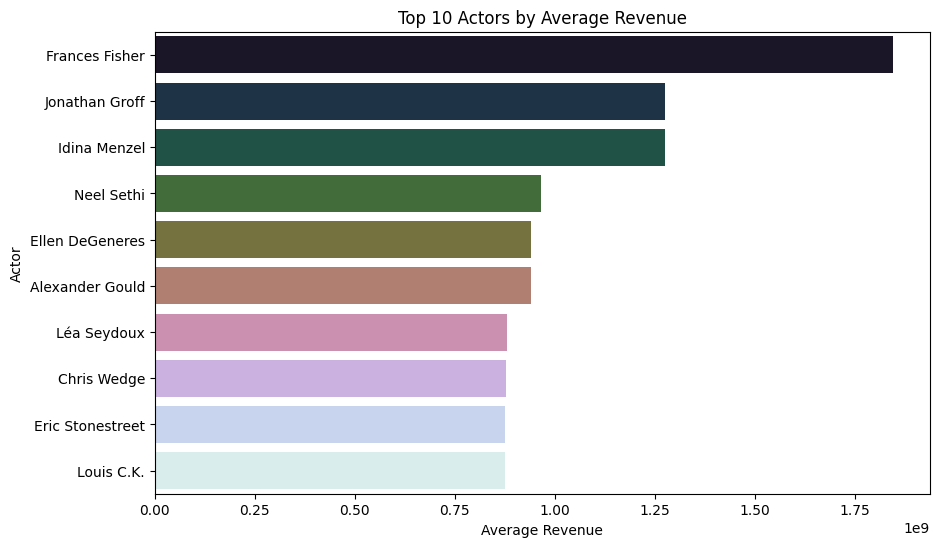

In [21]:
# Parse the cast column
def parse_cast(cast_str):
    try:
        cast_list = ast.literal_eval(cast_str)
        # Return the first 3 names to limit to main cast members
        return [c['name'] for c in cast_list[:3]]
    except Exception:
        return []

merged_df['parsed_cast'] = merged_df['cast'].apply(parse_cast)

# Explode cast to count frequency
actor_series = merged_df['parsed_cast'].explode()

# Plot 1: Top 10 Actors by Frequency
plt.figure(figsize=(10, 6))
top_actors = actor_series.value_counts().head(10)
sns.barplot(x=top_actors.values, y=top_actors.index, palette="cool")
plt.xlabel('Count')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Frequency')
plt.show()

# Plot 2: Average Revenue by Actor (for top actors)
actor_revenue = merged_df.explode('parsed_cast').groupby('parsed_cast')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_actor_revenue = actor_revenue.head(10)
sns.barplot(x=top_actor_revenue.values, y=top_actor_revenue.index, palette="cubehelix")
plt.xlabel('Average Revenue')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Average Revenue')
plt.show()


**Crew Analysis (Director)**

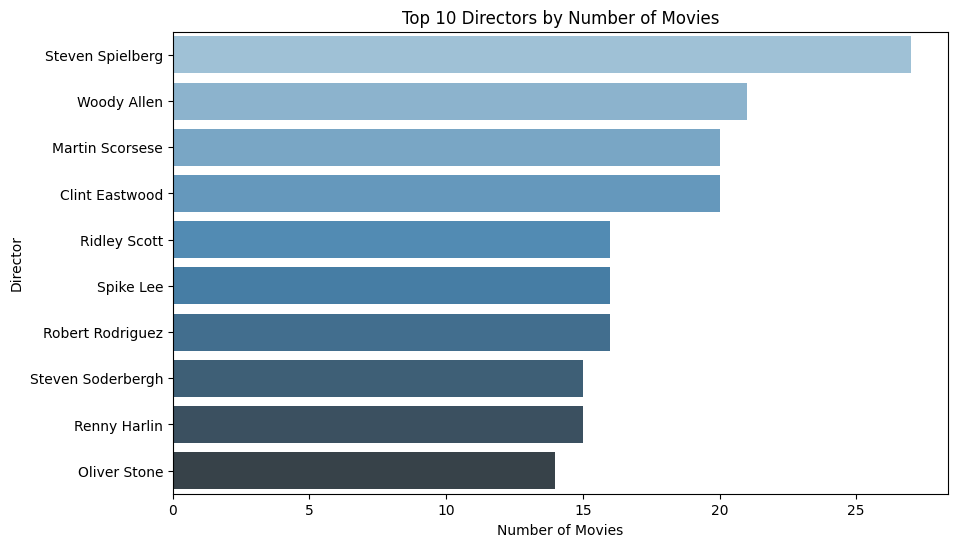

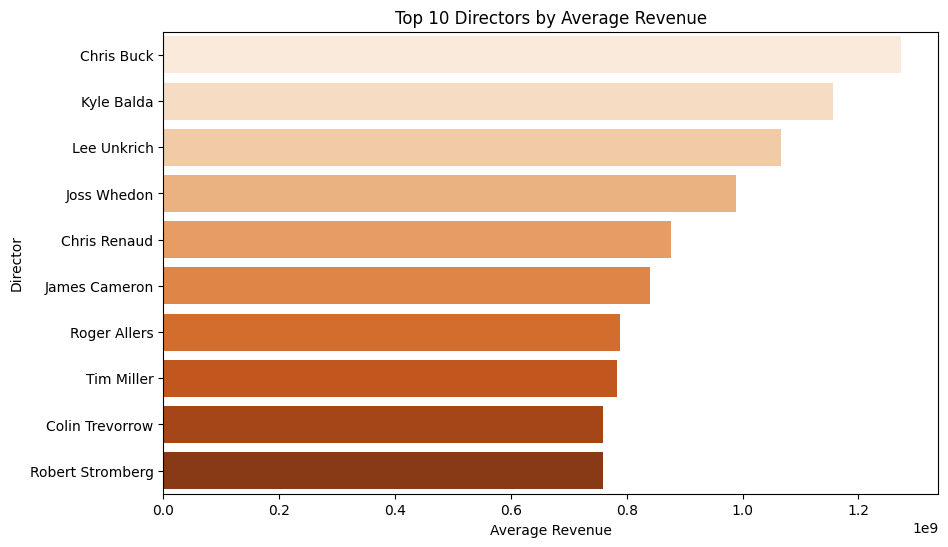

In [22]:
# Function to extract director from the crew column
def get_director(crew_str):
    try:
        crew_list = ast.literal_eval(crew_str)
        for member in crew_list:
            if member['job'] == 'Director':
                return member['name']
        return None
    except Exception:
        return None

merged_df['director'] = merged_df['crew'].apply(get_director)

# Plot 1: Top 10 Directors by Frequency
plt.figure(figsize=(10, 6))
director_counts = merged_df['director'].value_counts().head(10)
sns.barplot(x=director_counts.values, y=director_counts.index, palette="Blues_d")
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.title('Top 10 Directors by Number of Movies')
plt.show()

# Plot 2: Average Revenue by Director (Top 10 by revenue)
director_revenue = merged_df.groupby('director')['revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_director_revenue = director_revenue.head(10)
sns.barplot(x=top_director_revenue.values, y=top_director_revenue.index, palette="Oranges")
plt.xlabel('Average Revenue')
plt.ylabel('Director')
plt.title('Top 10 Directors by Average Revenue')
plt.show()


**Keywords Analysis**

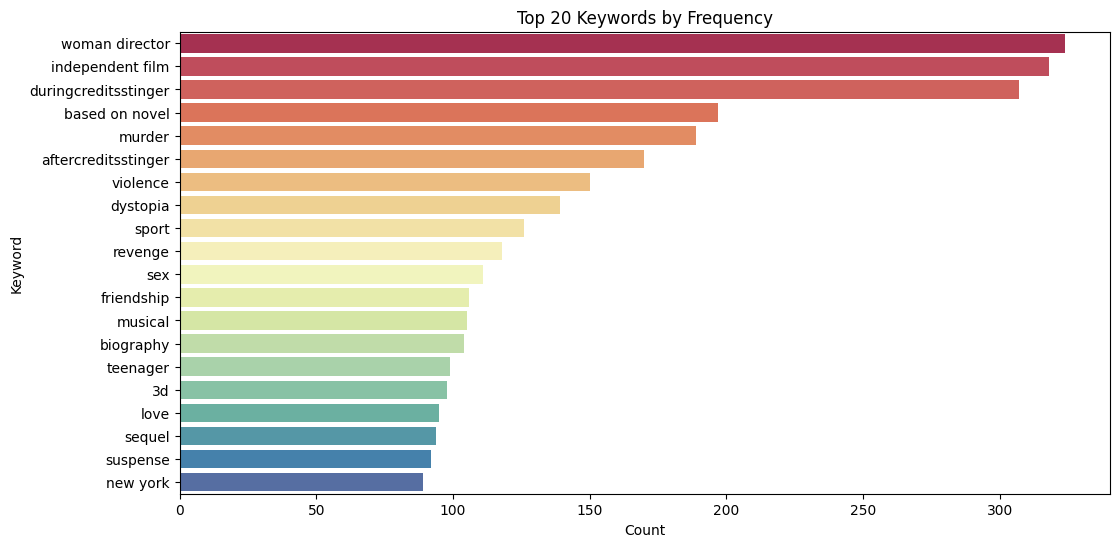

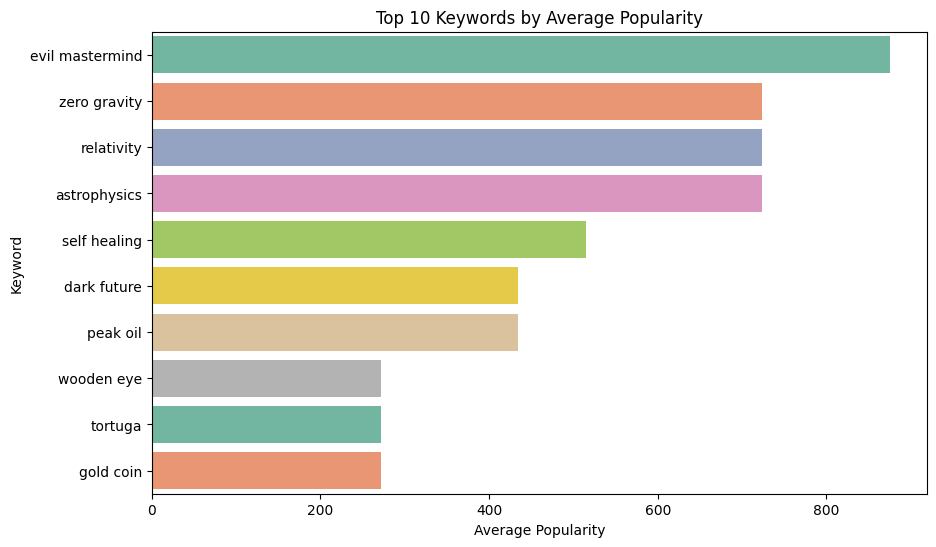

In [23]:
# Parse the keywords column
def parse_keywords(keywords_str):
    try:
        keywords_list = ast.literal_eval(keywords_str)
        return [keyword['name'] for keyword in keywords_list]
    except Exception:
        return []

merged_df['parsed_keywords'] = merged_df['keywords'].apply(parse_keywords)

# Plot 1: Top 20 Keywords by Frequency
plt.figure(figsize=(12, 6))
keyword_series = merged_df['parsed_keywords'].explode()
top_keywords = keyword_series.value_counts().head(20)
sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="Spectral")
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.title('Top 20 Keywords by Frequency')
plt.show()

# Plot 2: Average Popularity by Keyword (Top 10)
keyword_popularity = merged_df.explode('parsed_keywords').groupby('parsed_keywords')['popularity'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_keyword_popularity = keyword_popularity.head(10)
sns.barplot(x=top_keyword_popularity.values, y=top_keyword_popularity.index, palette="Set2")
plt.xlabel('Average Popularity')
plt.ylabel('Keyword')
plt.title('Top 10 Keywords by Average Popularity')
plt.show()


 **Time-Based Analysis (Release Trends**)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

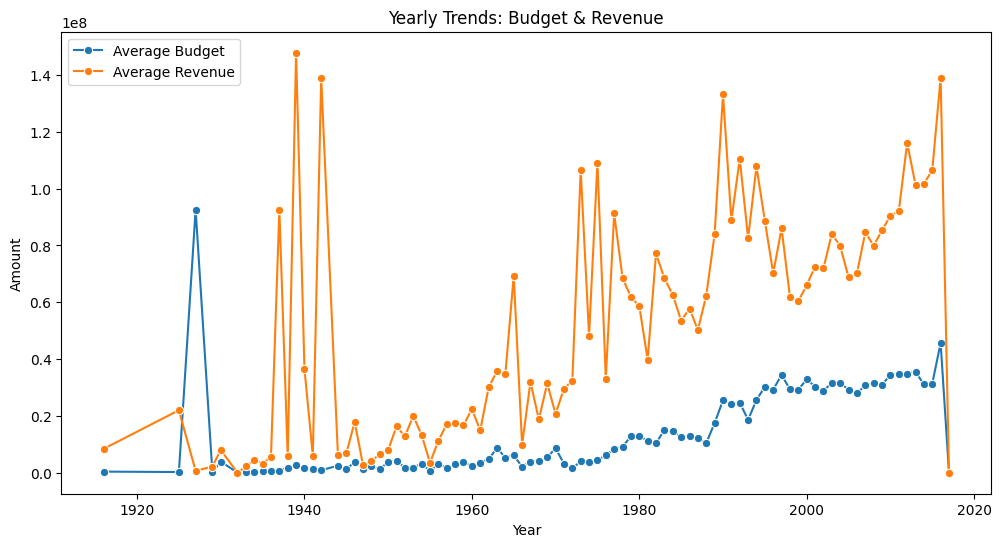

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


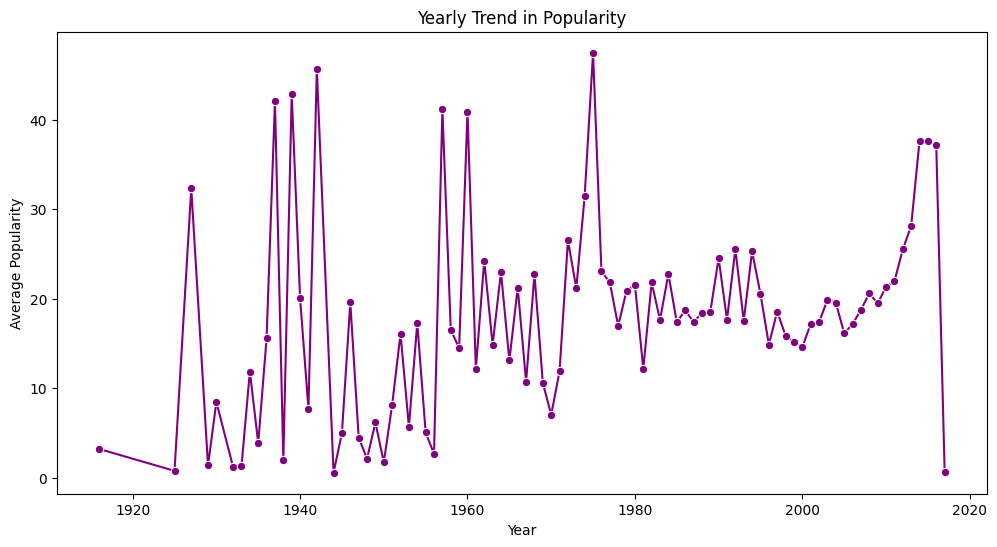

In [24]:
# Ensure release_date is datetime and extract the year
# merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')
# merged_df['year'] = merged_df['release_date'].dt.year

# Group by year and calculate averages
yearly_data = merged_df.groupby('year').agg({
    'budget': 'mean',
    'revenue': 'mean',
    'popularity': 'mean',
    'vote_average': 'mean'
}).reset_index()

# Plot: Trends of Budget and Revenue Over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='budget', data=yearly_data, marker='o', label='Average Budget')
sns.lineplot(x='year', y='revenue', data=yearly_data, marker='o', label='Average Revenue')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Yearly Trends: Budget & Revenue')
plt.legend()
plt.show()

# Plot: Trends of Popularity Over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='popularity', data=yearly_data, marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Yearly Trend in Popularity')
plt.show()


In [25]:
merged_df

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_count,year,movie_id,title_y,cast,crew,parsed_genres,parsed_cast,director,parsed_keywords
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,11800,2009,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war, space colon..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,4500,2007,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island, east india ..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,4466,2015,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent, sequel, mi..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,9106,2012,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist, secret i..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2124,2012,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion, space travel..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",...,238,1992,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...","[Action,

In [26]:
# Calculate overall mean vote average (C)
C = merged_df['vote_average'].mean()

# Define m as the 90th percentile of vote_count (or a fixed threshold)
m = merged_df['vote_count'].quantile(0.90)

# Filter out movies that have a vote_count less than m
qualified = merged_df[merged_df['vote_count'] >= m].copy()

# Define a function to compute the weighted rating
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m)) * R + (m/(v+m)) * C

# Compute weighted rating and create a new column
qualified['weighted_rating'] = qualified.apply(weighted_rating, axis=1)

# Sort movies by weighted rating
demographic_recommendations = qualified.sort_values('weighted_rating', ascending=False)
print(demographic_recommendations[['original_title', 'vote_average', 'vote_count', 'weighted_rating']].head(10))


                                     original_title  vote_average  vote_count  \
1881                       The Shawshank Redemption           8.5        8205   
662                                      Fight Club           8.3        9413   
65                                  The Dark Knight           8.2       12002   
3231                                   Pulp Fiction           8.3        8428   
96                                        Inception           8.1       13752   
3336                                  The Godfather           8.4        5893   
95                                     Interstellar           8.1       10867   
809                                    Forrest Gump           8.2        7927   
329   The Lord of the Rings: The Return of the King           8.1        8064   
1990                        The Empire Strikes Back           8.2        5879   

      weighted_rating  
1881         8.058883  
662          7.938962  
65           7.919787  
3231        

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fill missing overviews with empty string
merged_df['overview'] = merged_df['overview'].fillna('')

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the overview column
tfidf_matrix = tfidf.fit_transform(merged_df['overview'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Construct a reverse map of indices and movie titles
indices = pd.Series(merged_df.index, index=merged_df['original_title']).drop_duplicates()

# Recommendation function
def content_based_recommendations(title, cosine_sim=cosine_sim, df=merged_df, indices=indices, top_n=10):
    # Get the index of the movie that matches the title
    idx = indices.get(title)
    if idx is None:
        print("Title not found in the dataset.")
        return []
    
    # Get the pairwise similarity scores for this movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top_n most similar movies (excluding itself)
    sim_scores = sim_scores[1:top_n+1]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top similar movies
    return df[['original_title', 'overview']].iloc[movie_indices]

# Example usage:
print(content_based_recommendations("The Dark Knight"))


                               original_title  \
3                       The Dark Knight Rises   
428                            Batman Returns   
3853  Batman: The Dark Knight Returns, Part 2   
299                            Batman Forever   
1359                                   Batman   
119                             Batman Begins   
1181                                      JFK   
9          Batman v Superman: Dawn of Justice   
2507                                Slow Burn   
210                            Batman & Robin   

                                               overview  
3     Following the death of District Attorney Harve...  
428   Having defeated the Joker, Batman now faces th...  
3853  Batman has stopped the reign of terror that Th...  
299   The Dark Knight of Gotham City confronts a das...  
1359  The Dark Knight of Gotham City begins his war ...  
119   Driven by tragedy, billionaire Bruce Wayne ded...  
1181  New Orleans District Attorney Jim Garrison dis..

In [28]:
# Using the Surprise library with vote_average as the rating value

from surprise import SVD, Dataset, Reader
import pandas as pd

# Create a synthetic dataset: use each movie's vote_average as its rating.
# Since there’s no user dimension, we assign the same pseudo-user (e.g., user id = 1) to every movie.
# This approach lets you run a matrix factorization algorithm, but it won’t yield personalized recommendations.
synthetic_ratings = merged_df[['id', 'original_title', 'vote_average']].copy()
synthetic_ratings['userId'] = 1  # all movies rated by a single pseudo-user
synthetic_ratings.rename(columns={'id': 'movieId', 'vote_average': 'rating'}, inplace=True)

# Use the minimum and maximum from vote_average as the rating scale.
reader = Reader(rating_scale=(synthetic_ratings['rating'].min(), synthetic_ratings['rating'].max()))

data = Dataset.load_from_df(synthetic_ratings[['userId', 'movieId', 'rating']], reader)

# Split data (though all movies belong to one user)
trainset = data.build_full_trainset()

# Build and train the model
model = SVD()
model.fit(trainset)

# Predict the rating for a specific movie (e.g., movieId = 10)
pred = model.predict(1, 10)  # user 1, movie 10
print(f"Predicted rating for movie 10: {pred.est:.2f}")


Predicted rating for movie 10: 5.60
